In [1]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning

In [4]:
leads_df = leads_df.drop(['Prospect ID', 'Lead Number'], axis=1)

In [5]:
# replacing "Select" with nan
leads_df = leads_df.replace(to_replace='Select', value=np.nan)

In [6]:
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# finding null percentage in each column
def get_null_percentage():
    return round(100 * leads_df.isnull().sum()/leads_df.shape[0], 2)
null_counts = get_null_percentage()
null_counts

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [8]:
# finding columns to drop where null percenatge is more than 45
fields_to_drop = null_counts[null_counts > 45]
fields_to_drop

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

In [9]:
# droping cloumns with high null percentage
leads_df = leads_df.drop(fields_to_drop.index, axis=1)
leads_df.shape

(9240, 28)

In [10]:
# find list of categorical columns
cat_columns = leads_df.select_dtypes(['object']).columns
cat_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [11]:
# Find percenatge count of values in each column
def print_per_count():
    for col in cat_columns:
        print(f'**{col}**')
        print(round(leads_df[col].value_counts(normalize=True)*100,2))
        print()

print_per_count()

**Lead Origin**
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

**Lead Source**
Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Social Media          0.02
Live Chat             0.02
Press_Release         0.02
WeLearn               0.01
testone               0.01
NC_EDM                0.01
youtubechannel        0.01
blog                  0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
Name: Lead Source, dtype: float64

**Do Not Email**
No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

**Do Not Call**
No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

**Last Act

In [12]:
def find_skwed_cols():
    skwed_cols = []
    for col in cat_columns:
        per_count = round(leads_df[col].value_counts(normalize=True)*100,2)
        if(per_count[0] >= 99):
            skwed_cols.append(col)
    return skwed_cols

skwed_cols = find_skwed_cols()
skwed_cols

['Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [13]:
# drop highly skwed columns
leads_df = leads_df.drop(skwed_cols, axis=1)
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
# function to replace all the values which have less percentage count less than provided percentage with value 'Others'
def replace_with_other(col, per):
    temp = round(leads_df[col].value_counts(normalize=True)*100,2)
    temp = temp[temp < per]
    leads_df[col] = leads_df[col].apply(lambda x: 'Others' if x in temp.index else x)

In [15]:
replace_with_other('Lead Origin', 10)
replace_with_other('Lead Source', 10)
replace_with_other('Last Activity', 5)
replace_with_other('Country', 5)
replace_with_other('What is your current occupation', 5)
replace_with_other('Tags', 8)
replace_with_other('Last Notable Activity', 5)

In [16]:
get_null_percentage()

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
What is your current occupation           29.11
Tags                                      36.29
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [17]:
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


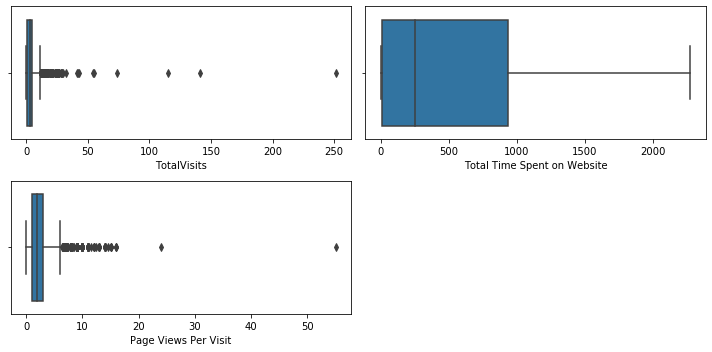

In [18]:
plt.figure(figsize=(10,5))
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
i=1
for col in num_cols:
    plt.subplot(2,2,i)
    sns.boxplot(leads_df[col])
    i = i+1
plt.tight_layout()
plt.show()

#### Imputation

In [19]:
def impute_with_median(col):
    leads_df[col] = leads_df[col].fillna(leads_df[col].median())

In [20]:
impute_with_median('TotalVisits')
impute_with_median('Total Time Spent on Website')
impute_with_median('Page Views Per Visit')

In [21]:
leads_df = leads_df[~leads_df['Lead Source'].isnull()]

In [22]:
get_null_percentage()

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              1.10
Country                                   26.36
Specialization                            36.42
What is your current occupation           29.23
Tags                                      36.31
City                                      39.53
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [23]:
#Dropping City and Country as country has more values for India and will make the model bias
#Similarly City is not providing any information clearly from Business Perspective
leads_df = leads_df.drop(['City','Country'], axis=1)

In [24]:
leads_df['A free copy of Mastering The Interview'].value_counts()

No     6316
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [25]:
# converting Yes to 1 and No to 0
leads_df['A free copy of Mastering The Interview'] = leads_df['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

### Dummy Variables

In [26]:
leads_df.select_dtypes(['object']).columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Last Notable Activity'],
      dtype='object')

In [27]:
#rem_cat_cols = leads_df.select_dtypes(['object']).columns

#for col in rem_cat_cols:
#    dummy = pd.get_dummies(leads_df[col], prefix=col, drop_first=True)
#    leads_df = pd.concat([leads_df, dummy], axis=1)
    
#leads_df = leads_df.drop(rem_cat_cols, axis=1)
#leads_df.head()

In [28]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(leads_df['Lead Origin'], prefix='Lead Origin')
# Dropping Lead Origin_Others column
lo1 = lo.drop(['Lead Origin_Others'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df, lo1], axis=1)

# Creating dummy variables for the variable 'Lead Source'.
ls = pd.get_dummies(leads_df['Lead Source'], prefix='Lead Source')
ls1 = ls.drop(['Lead Source_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ls1], axis=1)

# Creating dummy variables for the variable 'Do Not Email'.
dne = pd.get_dummies(leads_df['Do Not Email'], prefix='Do Not Email')
dne1 = dne.drop(['Do Not Email_No'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,dne1], axis=1)

# Creating dummy variables for the variable 'Last Activity'. 
la = pd.get_dummies(leads_df['Last Activity'], prefix='Last Activity')
la1 = la.drop(['Last Activity_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,la1], axis=1)

# Creating dummy variables for the variable 'Specialization'.
sp =pd.get_dummies(leads_df['Specialization'], prefix='Specialization')
sp1 = sp.drop(['Specialization_Services Excellence'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,sp1], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'. 
oc = pd.get_dummies(leads_df['What is your current occupation'], prefix='Occupation')
oc1 = oc.drop(['Occupation_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,oc1], axis=1)

# Creating dummy variables for the variable 'Tags'.
tg =pd.get_dummies(leads_df['Tags'], prefix='Tags')
tg1 = tg.drop(['Tags_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,tg1], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'.
lna =pd.get_dummies(leads_df['Last Notable Activity'], prefix='Last Notable Activity')
lna1 = lna.drop(['Last Notable Activity_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,lna1], axis=1)

In [29]:
#Drop orignal columns
cols_to_drop1 = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization', 'What is your current occupation', 'Tags',
       'Last Notable Activity']

In [30]:
leads_df = leads_df.drop(cols_to_drop1, axis = 1)
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 41 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Converted                                         9204 non-null   int64  
 1   TotalVisits                                       9204 non-null   float64
 2   Total Time Spent on Website                       9204 non-null   int64  
 3   Page Views Per Visit                              9204 non-null   float64
 4   A free copy of Mastering The Interview            9204 non-null   int64  
 5   Lead Origin_API                                   9204 non-null   uint8  
 6   Lead Origin_Landing Page Submission               9204 non-null   uint8  
 7   Lead Source_Direct Traffic                        9204 non-null   uint8  
 8   Lead Source_Google                                9204 non-null   uint8  
 9   Lead Source_Olark C

### Test-Train Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Putting features to X
X = leads_df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Unemployed,Occupation_Working Professional,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,5.0,674,2.5,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,2.0,1532,2.0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1.0,305,1.0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,2.0,1428,1.0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [33]:
#Putting target to y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].head()

<ipython-input-36-33c018b7e372>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2835,-0.092199,1.892235,0.287109
3088,-0.092199,-0.469942,0.287109
8413,0.308979,1.919830,1.210231
5015,-0.092199,1.459905,0.287109
5166,-0.693965,-0.896752,-1.097575


In [37]:
# checking conversion rate
round(100 * sum(leads_df['Converted'])/leads_df.shape[0],2)

38.37

We have almost 38% conversion rate

### Looking at Correlations

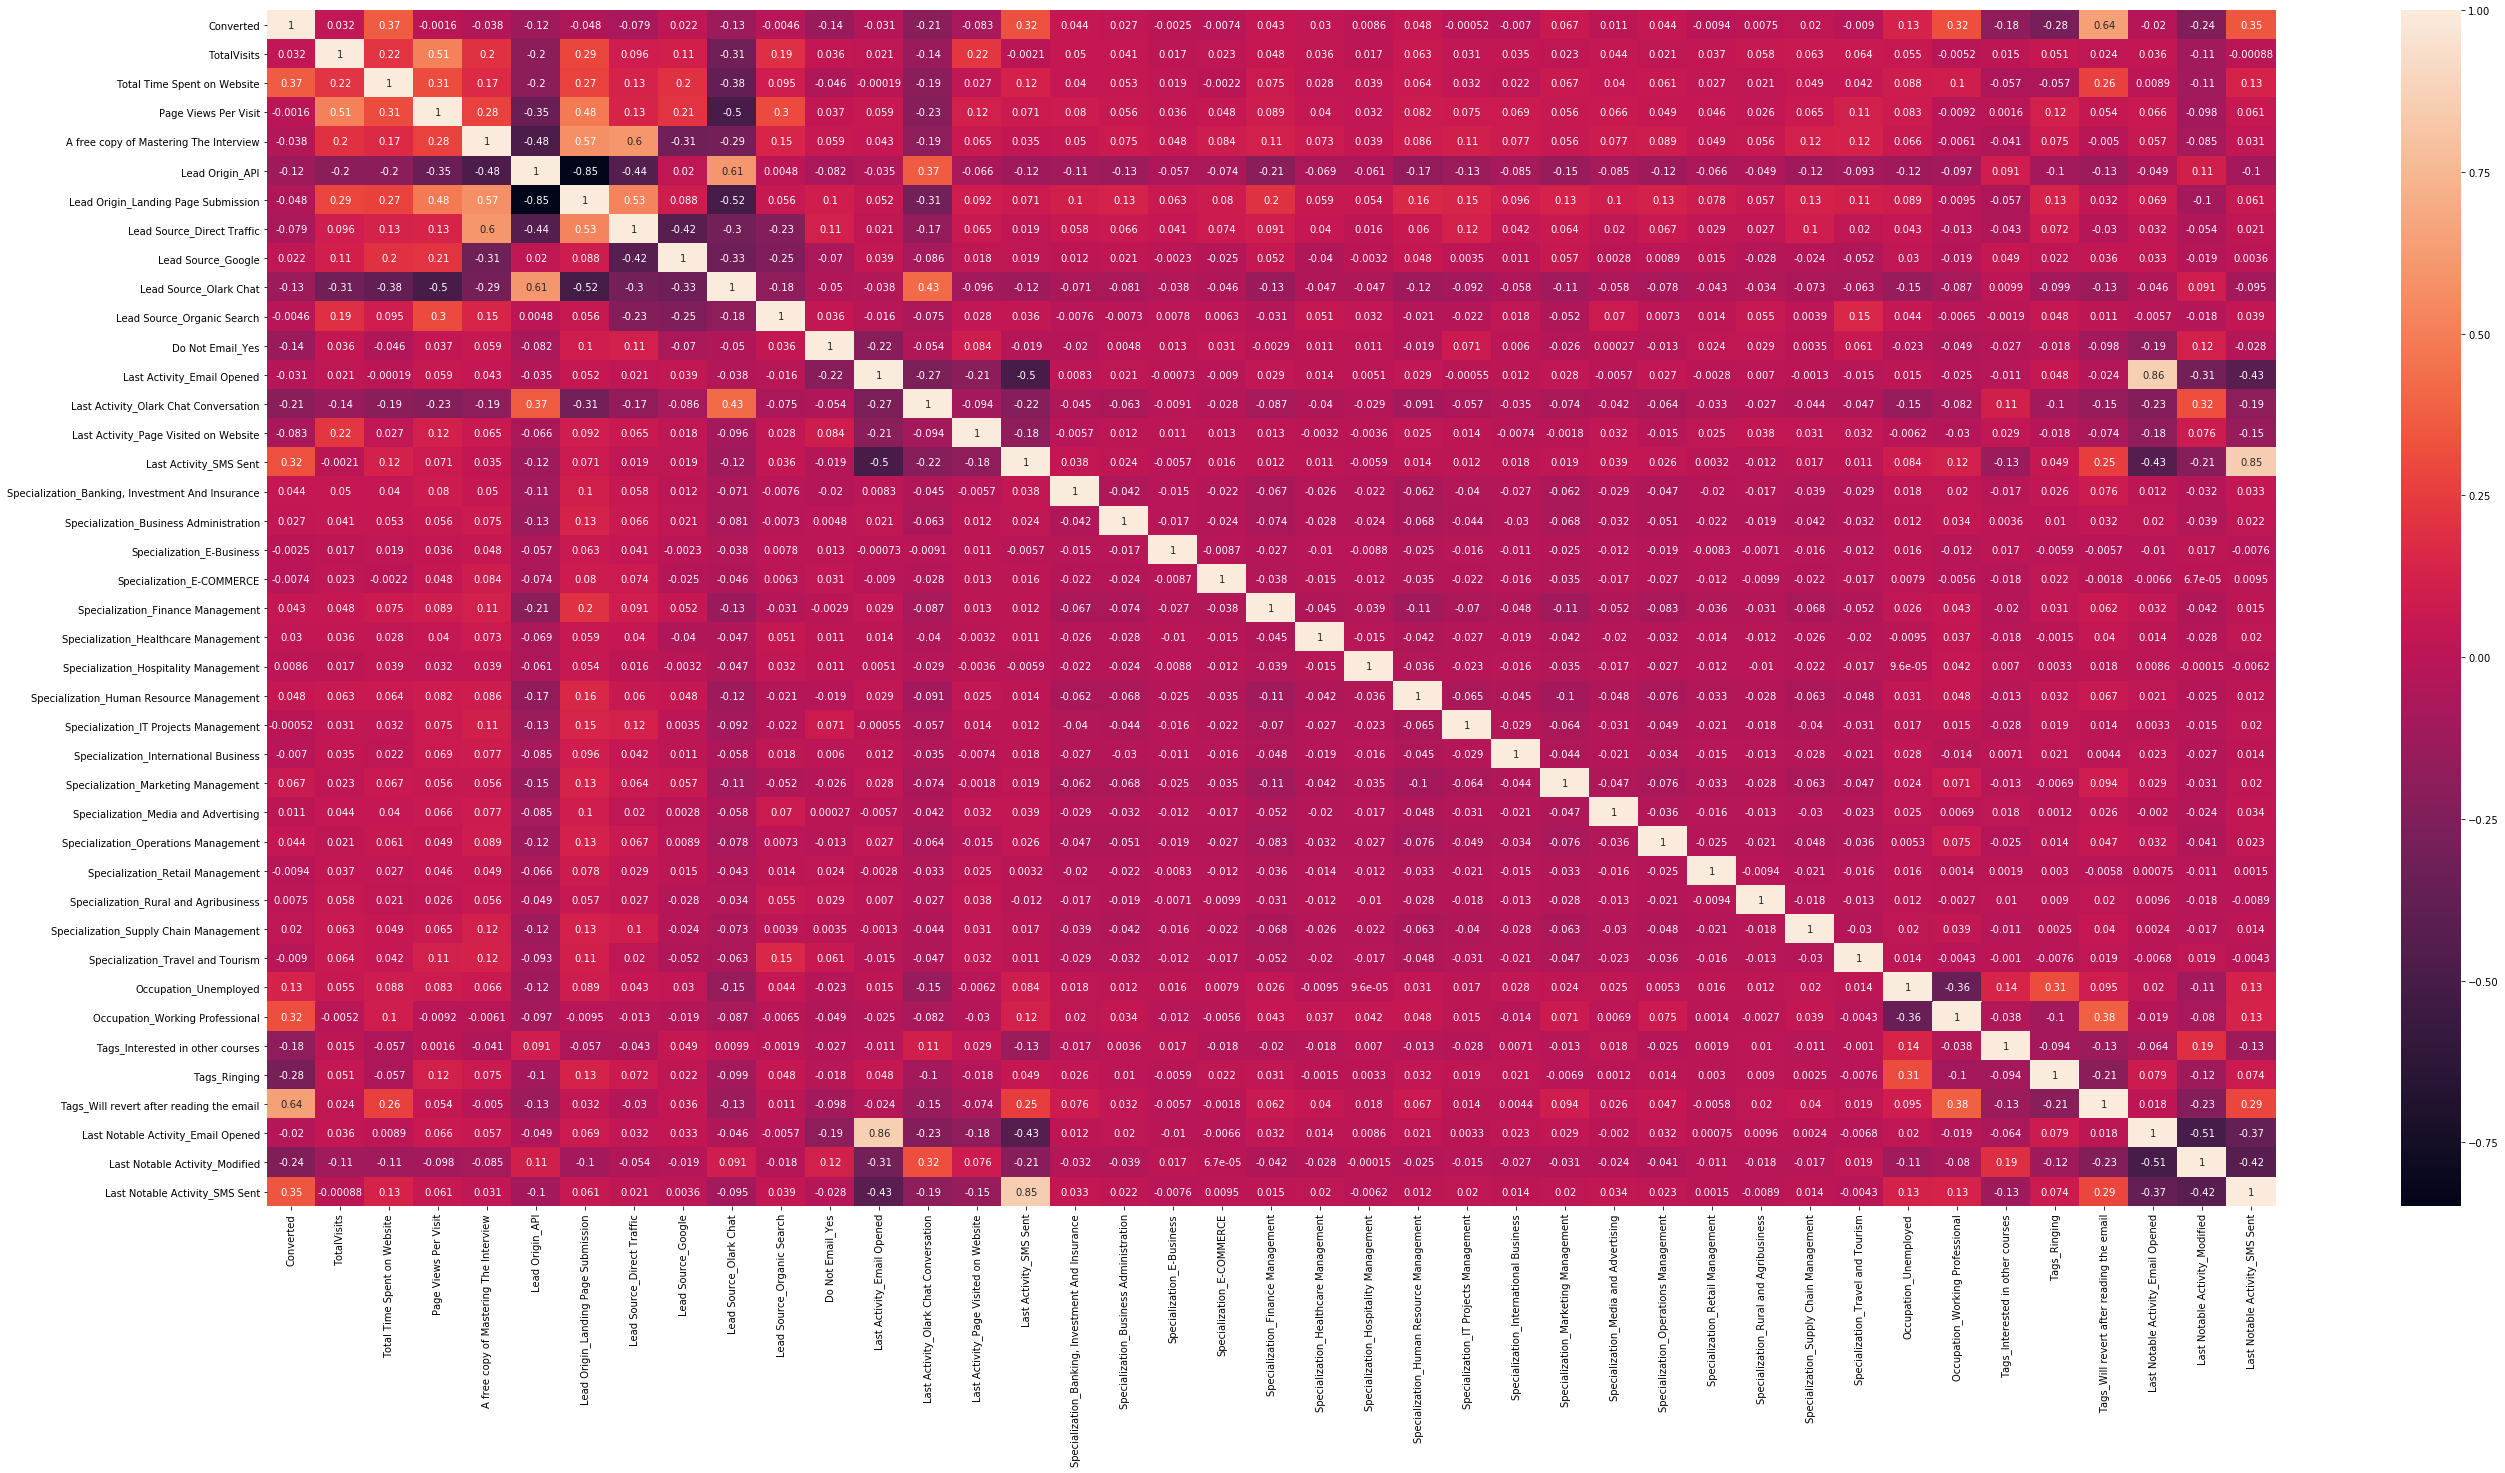

In [38]:
plt.figure(figsize=(45,22))
sns.heatmap(leads_df.corr(), annot=True)
plt.show()

In [39]:
cols_to_drop = ['Lead Origin_API', 'Last Activity_SMS Sent', 'Last Activity_Olark Chat Conversation']
X_test = X_test.drop(cols_to_drop, axis = 1)
X_train = X_train.drop(cols_to_drop, axis=1)

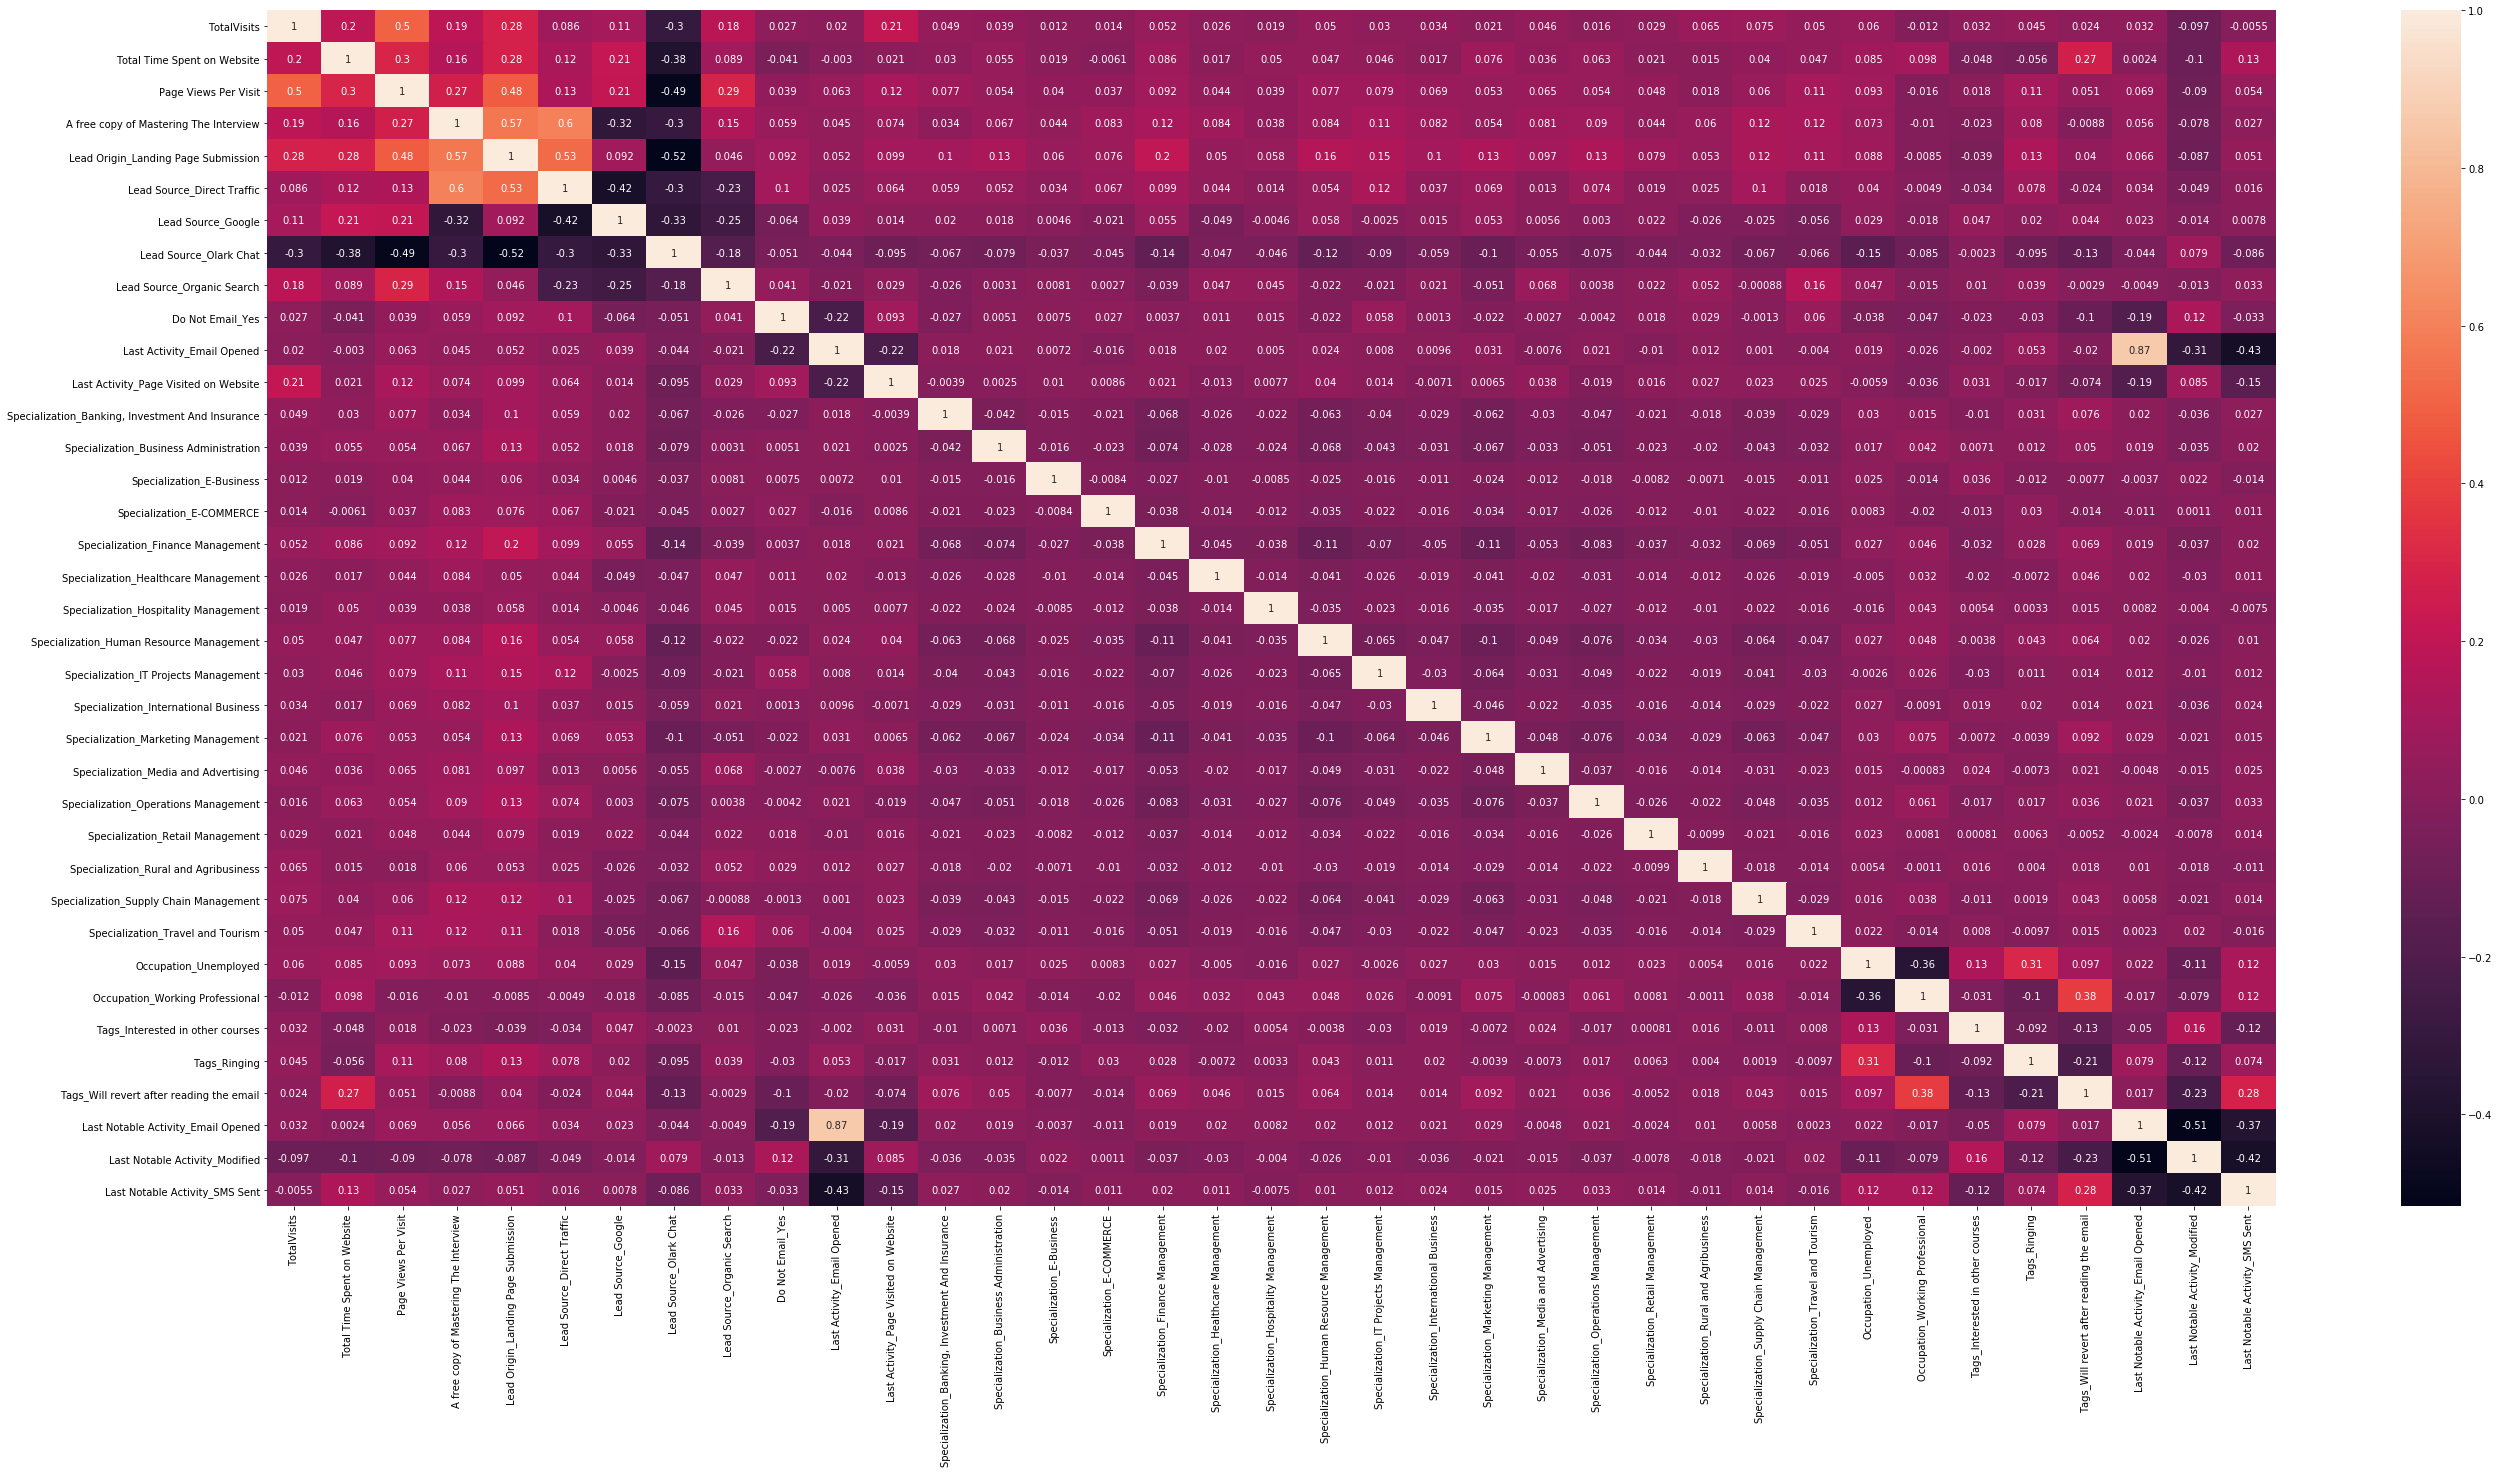

In [40]:
plt.figure(figsize=(45,22))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

## Model Building

In [41]:
import statsmodels.api as sm

In [42]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6404
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1698.2
Date:                Mon, 20 Apr 2020   Deviance:                       3396.4
Time:                        00:29:02   Pearson chi2:                 9.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.1590      0.234     -0.679      0.497      -0.618       0.300
TotalVisits                                          0.1804      0.055      3.254      0.001       0.072       0.289
Total Time Spent on Website                          1.0869      0.053     20.493      0.000       0.983       1.191
Page Views Per Visit                                -0.3331      0.074     -4.489      0.000      -0.479      -0.188
A free copy of Mastering The Interview               0.1086      0.146      0.743      0.458      -0.178       0.395
Lead Origin_Landing Page Submission                 -0.4992      0.181     -2.760      0.006      -0.854      -0.145
Lead Source_Direct Traffic                          -2.6002      0.218    -11.925      0.000      -3.028      -2.173
Lead Source_Google                                  -2.2327      0.183    -12.184      0.000      -2.592      -1.873
Lead Source_Olark Chat                              -1.6483      0.173     -9.548      0.000      -1.987      -1.310
Lead Source_Organic Search                          -2.3009      0.218    -10.571      0.000      -2.727      -1.874
Do Not Email_Yes                                    -1.2521      0.212     -5.898      0.000      -1.668      -0.836
Last Activity_Email Opened                           0.9186      0.174      5.275      0.000       0.577       1.260
Last Activity_Page Visited on Website               -0.1592      0.207     -0.767      0.443      -0.566       0.247
Specialization_Banking, Investment And Insurance     0.6764      0.293      2.308      0.021       0.102       1.251
Specialization_Business Administration               0.3156      0.270      1.168      0.243      -0.214       0.845
Specialization_E-Business                            0.4781      0.552      0.866      0.387      -0.604       1.560
Specialization_E-COMMERCE                            0.2785      0.434      0.642      0.521      -0.571       1.128
Specialization_Finance Management                    0.3278      0.210      1.563      0.118      -0.083       0.739
Specialization_Healthcare Management                 0.1625      0.374      0.434      0.664      -0.571       0.896
Specialization_Hospitality Management                0.0273      0.443      0.062      0.951      -0.841       0.895
Specialization_Human Resource Management             0.2044      0.218      0.939      0.348      -0.222       0.631
Specialization_IT Projects Management                0.3213      0.286      1.123      0.261      -0.239       0.882
Specialization_International Business                0.0706      0.375      0.188      0.851      -0.665       0.806
Specialization_Marketing Management      

### Step 8: Feature Selection Using RFE

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [44]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)             # running RFE with 12 variables as output
rfe = rfe.fit(X_train, y_train)

In [45]:
rfe.support_

array([False,  True, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
        True])

In [46]:
#check RFE ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('A free copy of Mastering The Interview', False, 21),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Page Visited on Website', False, 18),
 ('Specialization_Banking, Investment And Insurance', False, 4),
 ('Specialization_Business Administration', False, 11),
 ('Specialization_E-Business', False, 8),
 ('Specialization_E-COMMERCE', False, 13),
 ('Specialization_Finance Management', False, 9),
 ('Specialization_Healthcare Management', False, 19),
 ('Specialization_Hospitality Management', False, 26),
 ('Specialization_Human Resource Management', False, 14),
 ('Specialization_IT Projects Management', False, 12),
 ('Specialization_I

In [47]:
col = X_train.columns[rfe.support_]

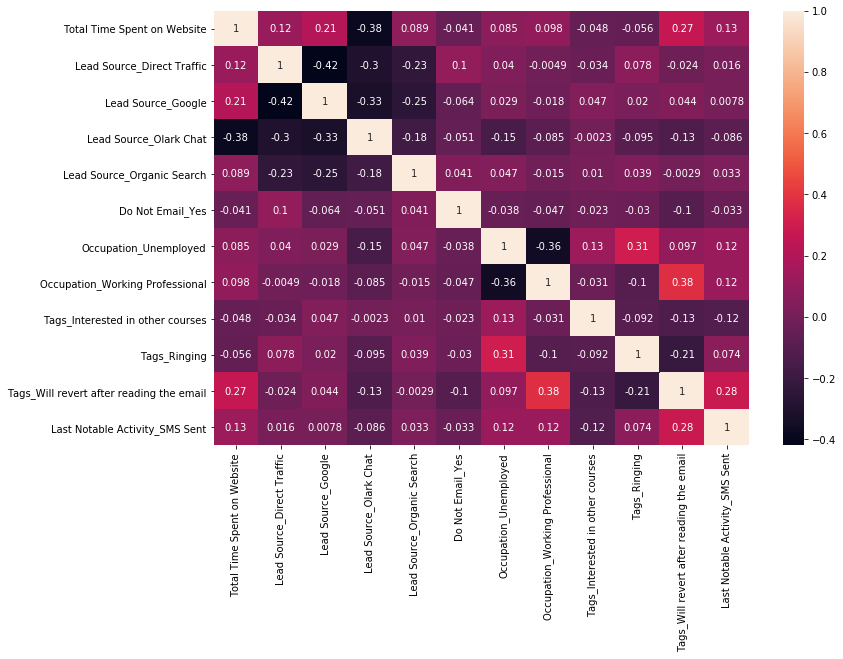

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.loc[:,col].corr(), annot=True)
plt.show()

In [49]:
# columns removed after RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
     

##### Assessing the model with StatsModels

In [50]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1750.1
Date:                Mon, 20 Apr 2020   Deviance:                       3500.2
Time:                        00:29:05   Pearson chi2:                 9.66e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1229      0.154      0.799      0.425      -0.179       0.424
Total Time Spent on Website                  1.0597      0.052     20.480      0.000       0.958       1.161
Lead Source_Direct Traffic                  -2.9063      0.170    -17.145      0.000      -3.238      -2.574
Lead Source_Google                          -2.5171      0.166    -15.198      0.000      -2.842      -2.193
Lead Source_Olark Chat                      -1.5779      0.164     -9.592      0.000      -1.900      -1.255
Lead Source_Organic Search                  -2.7061      0.194    -13.983      0.000      -3.085      -2.327
Do Not Email_Yes                            -1.5139      0.200     -7.570      0.000      -1.906      -1.122
Occupation_Unemployed                        1.2932      0.097     13.378      0.000       1.104       1.483
Occupation_Working Professional              2.2570      0.253      8.911      0.000       1.761       2.753
Tags_Interested in other courses            -3.2068      0.362     -8.855      0.000      -3.917      -2.497
Tags_Ringing                                -3.7777      0.229    -16.517      0.000      -4.226      -3.329
Tags_Will revert after reading the email     3.7064      0.176     21.095      0.000       3.362       4.051
Last Notable Activity_SMS Sent               2.0553      0.110     18.703      0.000       1.840       2.271
============================================================================================================
"""

In [51]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

2835    0.998728
3088    0.004601
8413    0.942655
5015    0.892072
5166    0.082767
          ...   
5758    0.090149
5213    0.989737
5413    0.971970
861     0.048878
7297    0.998811
Length: 6442, dtype: float64

In [52]:
y_train_pred = y_train_pred.values.reshape(-1)

In [53]:
y_train_pred[:10]

array([0.99872782, 0.00460139, 0.94265539, 0.89207235, 0.08276708,
       0.03520806, 0.61438323, 0.02408971, 0.20214458, 0.00524855])

##### Creating a dataframe with the actual Converted and the predicted probabilities

In [54]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

In [55]:
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,1,0.998728,2835
1,0,0.004601,3088
2,1,0.942655,8413
3,1,0.892072,5015
4,0,0.082767,5166


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [56]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted
0,1,0.998728,2835,1
1,0,0.004601,3088,0
2,1,0.942655,8413,1
3,1,0.892072,5015,1
4,0,0.082767,5166,0


In [57]:
from sklearn import metrics

In [58]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3701  264]
 [ 453 2024]]


In [59]:
# Predicted     not_converted    converted
# Actual
# not_churn        3758      207
# churn            434       2043  

In [60]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.888699161751009


#### Checking VIFs

In [61]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Occupation_Unemployed,3.27
10,Tags_Will revert after reading the email,2.03
2,Lead Source_Google,1.64
1,Lead Source_Direct Traffic,1.62
7,Occupation_Working Professional,1.50
9,Tags_Ringing,1.48
11,Last Notable Activity_SMS Sent,1.47
3,Lead Source_Olark Chat,1.32
4,Lead Source_Organic Search,1.29
0,Total Time Spent on Website,1.28


### Drop Occupation_Working Professional because of high correlation with other fields

In [63]:
# Let's drop Occupation_Unemployed since it has a high VIF
col = col.drop('Occupation_Working Professional')
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Do Not Email_Yes',
       'Occupation_Unemployed', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [64]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1794.7
Date:                Mon, 20 Apr 2020   Deviance:                       3589.3
Time:                        00:29:07   Pearson chi2:                 8.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.5470      0.145      3.780      0.000       0.263       0.831
Total Time Spent on Website                  1.0503      0.051     20.663      0.000       0.951       1.150
Lead Source_Direct Traffic                  -3.0877      0.167    -18.481      0.000      -3.415      -2.760
Lead Source_Google                          -2.7217      0.162    -16.773      0.000      -3.040      -2.404
Lead Source_Olark Chat                      -1.8546      0.160    -11.573      0.000      -2.169      -1.540
Lead Source_Organic Search                  -2.8784      0.191    -15.104      0.000      -3.252      -2.505
Do Not Email_Yes                            -1.5035      0.198     -7.599      0.000      -1.891      -1.116
Occupation_Unemployed                        1.0233      0.090     11.375      0.000       0.847       1.200
Tags_Interested in other courses            -3.1310      0.365     -8.579      0.000      -3.846      -2.416
Tags_Ringing                                -3.6929      0.227    -16.265      0.000      -4.138      -3.248
Tags_Will revert after reading the email     4.1653      0.173     24.041      0.000       3.826       4.505
Last Notable Activity_SMS Sent               2.0054      0.108     18.507      0.000       1.793       2.218
============================================================================================================
"""

In [65]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [66]:
y_train_pred[:10]

array([0.99909501, 0.0047828 , 0.93783181, 0.88301664, 0.09540061,
       0.04464718, 0.65214196, 0.02409719, 0.19452871, 0.005428  ])

In [67]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [68]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted
0,1,0.999095,2835,1
1,0,0.004783,3088,0
2,1,0.937832,8413,1
3,1,0.883017,5015,1
4,0,0.095401,5166,0


In [69]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8810928283141881


#### The accuracy is almost the same.

### Let's now check the VIFs again

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Occupation_Unemployed,2.74
2,Lead Source_Google,1.59
9,Tags_Will revert after reading the email,1.59
1,Lead Source_Direct Traffic,1.56
10,Last Notable Activity_SMS Sent,1.46
8,Tags_Ringing,1.45
3,Lead Source_Olark Chat,1.31
0,Total Time Spent on Website,1.28
4,Lead Source_Organic Search,1.27
7,Tags_Interested in other courses,1.15


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [71]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3697,  268],
       [ 498, 1979]], dtype=int64)

In [72]:
# Actual/Predicted     not_converted    converted
        # not_churn        3703      262
        # churn            471       2006  

In [73]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8810928283141881

In [74]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [75]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7989503431570448

In [76]:
# Let us calculate specificity
TN / float(TN+FP)

0.9324085750315259

In [77]:
# Calculate false postive rate - predicting converted when students are not converted into lead
print(FP/ float(TN+FP))

0.06759142496847415


In [78]:
# positive predictive value 
print (TP / float(TP+FP))

0.8807298620382733


In [79]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8812872467222884


### Drop Lead Source_Google because of high correlation with other fields

In [80]:
# Let's drop Occupation_Unemployed since it has a high VIF
col = col.drop('Lead Source_Google')
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Do Not Email_Yes', 'Occupation_Unemployed',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [81]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6431
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1954.6
Date:                Mon, 20 Apr 2020   Deviance:                       3909.2
Time:                        00:29:09   Pearson chi2:                 6.88e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4589      0.082    -17.713      0.000      -1.620      -1.298
Total Time Spent on Website                  0.8407      0.046     18.447      0.000       0.751       0.930
Lead Source_Direct Traffic                  -1.0271      0.106     -9.672      0.000      -1.235      -0.819
Lead Source_Olark Chat                      -0.0362      0.117     -0.309      0.757      -0.266       0.193
Lead Source_Organic Search                  -0.8011      0.137     -5.829      0.000      -1.070      -0.532
Do Not Email_Yes                            -1.4129      0.187     -7.546      0.000      -1.780      -1.046
Occupation_Unemployed                        1.1064      0.086     12.904      0.000       0.938       1.274
Tags_Interested in other courses            -3.1020      0.346     -8.970      0.000      -3.780      -2.424
Tags_Ringing                                -3.7418      0.224    -16.667      0.000      -4.182      -3.302
Tags_Will revert after reading the email     4.1670      0.170     24.466      0.000       3.833       4.501
Last Notable Activity_SMS Sent               1.8949      0.104     18.218      0.000       1.691       2.099
============================================================================================================
"""

In [82]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [83]:
y_train_pred[:10]

array([0.99932509, 0.01110299, 0.91336118, 0.85102774, 0.09543132,
       0.05193903, 0.24853185, 0.03631081, 0.36165155, 0.01480909])

In [84]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [85]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted
0,1,0.999325,2835,1
1,0,0.011103,3088,0
2,1,0.913361,8413,1
3,1,0.851028,5015,1
4,0,0.095431,5166,0


In [86]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8717789506364483


### Let's now check the VIFs again

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Occupation_Unemployed,2.33
8,Tags_Will revert after reading the email,1.56
9,Last Notable Activity_SMS Sent,1.44
7,Tags_Ringing,1.43
1,Lead Source_Direct Traffic,1.36
2,Lead Source_Olark Chat,1.28
0,Total Time Spent on Website,1.26
3,Lead Source_Organic Search,1.17
6,Tags_Interested in other courses,1.13
4,Do Not Email_Yes,1.10


In [88]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3711,  254],
       [ 572, 1905]], dtype=int64)

In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8717789506364483

In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7690754945498587

In [92]:
# Let us calculate specificity
TN / float(TN+FP)

0.9359394703656999

In [93]:
# Calculate false postive rate - predicting converted when students are not converted into lead
print(FP/ float(TN+FP))

0.06406052963430013


In [94]:
# positive predictive value 
print (TP / float(TP+FP))

0.8823529411764706


In [95]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8664487508755545


### Drop Lead Source_Olark Chat because of high correlation with other fields

In [96]:
# Let's drop Occupation_Unemployed since it has a high VIF
col = col.drop('Lead Source_Olark Chat')
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Organic Search', 'Do Not Email_Yes',
       'Occupation_Unemployed', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [97]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1954.6
Date:                Mon, 20 Apr 2020   Deviance:                       3909.3
Time:                        00:29:11   Pearson chi2:                 6.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4713      0.072    -20.418      0.000      -1.613      -1.330
Total Time Spent on Website                  0.8458      0.043     19.860      0.000       0.762       0.929
Lead Source_Direct Traffic                  -1.0187      0.103     -9.917      0.000      -1.220      -0.817
Lead Source_Organic Search                  -0.7929      0.135     -5.875      0.000      -1.057      -0.528
Do Not Email_Yes                            -1.4122      0.187     -7.541      0.000      -1.779      -1.045
Occupation_Unemployed                        1.1087      0.085     12.979      0.000       0.941       1.276
Tags_Interested in other courses            -3.1010      0.346     -8.965      0.000      -3.779      -2.423
Tags_Ringing                                -3.7411      0.225    -16.662      0.000      -4.181      -3.301
Tags_Will revert after reading the email     4.1705      0.170     24.535      0.000       3.837       4.504
Last Notable Activity_SMS Sent               1.8957      0.104     18.230      0.000       1.692       2.100
============================================================================================================
"""

In [98]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [99]:
y_train_pred[:10]

array([0.99932761, 0.0109735 , 0.91403278, 0.85184628, 0.09710683,
       0.05162089, 0.24581135, 0.03611766, 0.35902635, 0.0146128 ])

In [100]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [101]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted
0,1,0.999328,2835,1
1,0,0.010974,3088,0
2,1,0.914033,8413,1
3,1,0.851846,5015,1
4,0,0.097107,5166,0


In [102]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8716237193418193


### Let's now check the VIFs again

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Occupation_Unemployed,2.21
7,Tags_Will revert after reading the email,1.56
6,Tags_Ringing,1.43
8,Last Notable Activity_SMS Sent,1.43
1,Lead Source_Direct Traffic,1.34
2,Lead Source_Organic Search,1.16
5,Tags_Interested in other courses,1.13
3,Do Not Email_Yes,1.10
0,Total Time Spent on Website,1.08


In [104]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3711,  254],
       [ 573, 1904]], dtype=int64)

In [105]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8716237193418193

In [106]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7686717803794914

In [108]:
# Let us calculate specificity
TN / float(TN+FP)

0.9359394703656999

In [109]:
# Calculate false postive rate - predicting converted when students are not converted into lead
print(FP/ float(TN+FP))

0.06406052963430013


In [110]:
# positive predictive value 
print (TP / float(TP+FP))

0.8822984244670992


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8662464985994398


### Step 9: Plotting the ROC Curve
### An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

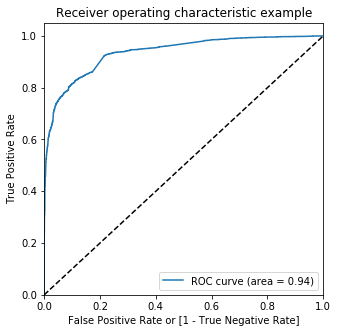

In [114]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [115]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.999328,2835,1,1,1,1,1,1,1,1,1,1,1
1,0,0.010974,3088,0,1,0,0,0,0,0,0,0,0,0
2,1,0.914033,8413,1,1,1,1,1,1,1,1,1,1,1
3,1,0.851846,5015,1,1,1,1,1,1,1,1,1,1,0
4,0,0.097107,5166,0,1,0,0,0,0,0,0,0,0,0


In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384508  1.000000  0.000000
0.1   0.1  0.717324  0.960032  0.565700
0.2   0.2  0.827538  0.932176  0.762169
0.3   0.3  0.855635  0.840937  0.864817
0.4   0.4  0.868830  0.805813  0.908197
0.5   0.5  0.871624  0.768672  0.935939
0.6   0.6  0.872245  0.734760  0.958134
0.7   0.7  0.853462  0.666936  0.969987
0.8   0.8  0.845390  0.627776  0.981337
0.9   0.9  0.823347  0.556722  0.989912


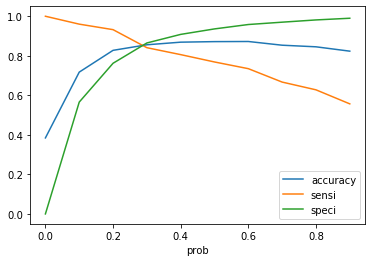

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [118]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.999328,2835,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.010974,3088,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.914033,8413,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.851846,5015,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.097107,5166,0,1,0,0,0,0,0,0,0,0,0,0


In [119]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8556348959950326

In [120]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[3429,  536],
       [ 394, 2083]], dtype=int64)

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8409366168752523

In [123]:
# Let us calculate specificity
TN / float(TN+FP)

0.8648171500630517

In [124]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1351828499369483


In [125]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7953417334860634


In [126]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8969395762490191


### Precision and Recall

Looking at the confusion matrix again

In [127]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3711,  254],
       [ 573, 1904]], dtype=int64)

##### Precision
TP / TP + FP

In [128]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8822984244670992

##### Recall
TP / TP + FN

In [129]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7686717803794914

### Using sklearn utilities for the same

In [130]:
from sklearn.metrics import precision_score, recall_score

In [131]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8822984244670992

In [132]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7686717803794914

### Precision and recall tradeoff

In [133]:
from sklearn.metrics import precision_recall_curve

In [134]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6437    0
 6438    1
 6439    1
 6440    0
 6441    1
 Name: Converted, Length: 6442, dtype: int64,
 0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6437    0
 6438    1
 6439    1
 6440    0
 6441    1
 Name: Predicted, Length: 6442, dtype: int64)

In [135]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

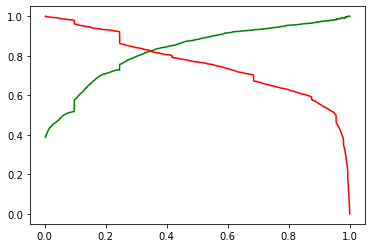

In [136]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [137]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [138]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Organic Search,Do Not Email_Yes,Occupation_Unemployed,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
76,0.197870,0,0,0,0,0,0,1,0
5304,1.640196,0,0,0,1,0,0,1,1
2092,-0.120398,0,0,0,1,0,0,0,0
582,1.222583,0,0,0,1,0,0,1,0
93,0.644917,0,0,0,0,0,0,0,0


In [139]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [140]:
y_test_pred = res.predict(X_test_sm)

In [141]:
y_test_pred[:10]

76      0.946166
5304    0.999168
2092    0.385931
582     0.992170
93      0.283763
5170    0.995445
3500    0.999069
7103    0.014457
7366    0.097107
1023    0.008599
dtype: float64

In [142]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [143]:
# Let's see the head
y_pred_1.head()

,0
76,0.946166
5304,0.999168
2092,0.385931
582,0.992170
93,0.283763


In [144]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [145]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [146]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [147]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [148]:
y_pred_final.head()

,Converted,LeadID,0
0,1,76,0.946166
1,1,5304,0.999168
2,0,2092,0.385931
3,1,582,0.992170
4,0,93,0.283763


In [149]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [150]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Converted_Prob'], axis=1)

In [151]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Converted_Prob
0,76,1,0.946166
1,5304,1,0.999168
2,2092,0,0.385931
3,582,1,0.992170
4,93,0,0.283763


In [152]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [153]:
y_pred_final.head()

,LeadID,Converted,Converted_Prob,Final_Predicted
0,76,1,0.946166,1
1,5304,1,0.999168,1
2,2092,0,0.385931,0
3,582,1,0.992170,1
4,93,0,0.283763,0


In [154]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8559015206372194